<a href="https://colab.research.google.com/github/ipshitaRB/Visualize-Earnings-Based-On-College-Majors/blob/master/Visualize_earnings_based_on_college_majors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Earnings Based On College Majors


I will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).



Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:



* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
 * Using scatter plots
* How many majors are predominantly male? Predominantly female?
 * Using histograms
* Which category of majors have the most students?
  * Using bar plots







## Extract and Load data onto a dataframe

In [0]:
import matplotlib as plt
import pandas as pd



In [0]:
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
recent_grads = pd.read_csv("/content/college_data/recent-grads.csv")

## Explore data

In [6]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [7]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [9]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [10]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

## Remove missing data

In [12]:
recent_grads.shape[0]

173

In [0]:
recent_grads = recent_grads.dropna()

After removing null values let us check the number of rows.

In [14]:
recent_grads.shape[0]

172

Only 1 row contained missing values

## Visualize using Scatterplots

Let us generate scatterplots to study various relations between the columns

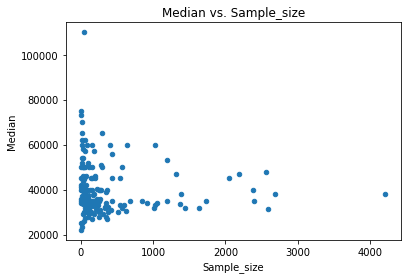

In [16]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')